In [1]:
import os

base_dir = "Project2_AttritionAnalysis"

folders = [
    "data",
    "notebooks",
    "visuals/charts",
    "report"
]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Folder structure created successfully ✅")


Folder structure created successfully ✅


In [2]:
!ls Project2_AttritionAnalysis


data  notebooks  report  visuals


In [3]:
import pandas as pd

df = pd.read_csv(
    "Project2_AttritionAnalysis/data/WA_Fn-UseC_-HR-Employee-Attrition.csv"
)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check missing values
df.isnull().sum()

# Convert Attrition to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(columns=drop_cols, inplace=True)


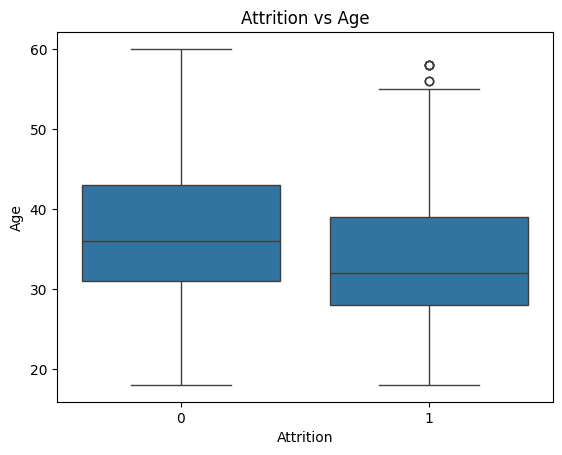

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Attrition vs Age")
plt.savefig(
    "Project2_AttritionAnalysis/visuals/charts/attrition_vs_age.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()


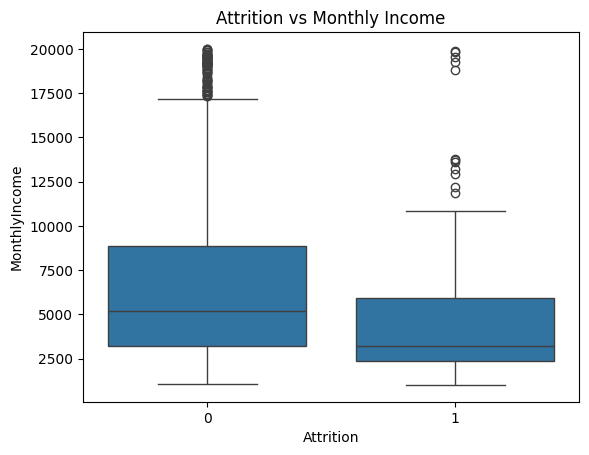

In [18]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.savefig(
    "Project2_AttritionAnalysis/visuals/charts/attrition_vs_monthly_income.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()


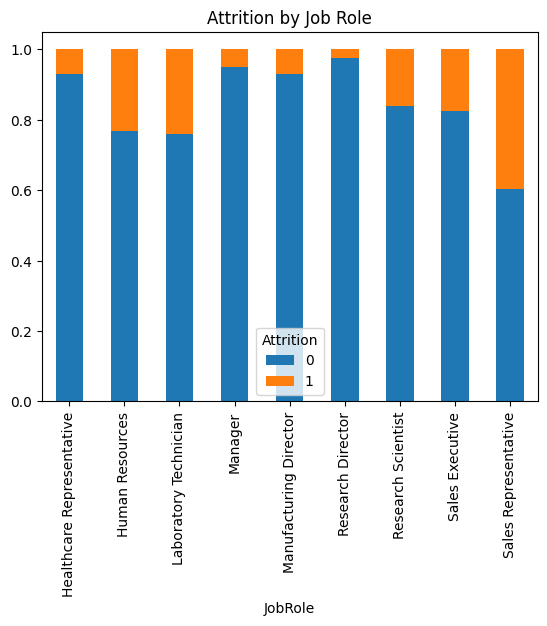

In [17]:
attrition_role = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')
attrition_role.plot(kind='bar', stacked=True)
plt.title("Attrition by Job Role")
plt.savefig(
    "Project2_AttritionAnalysis/visuals/charts/attrition_vs_job_role.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()


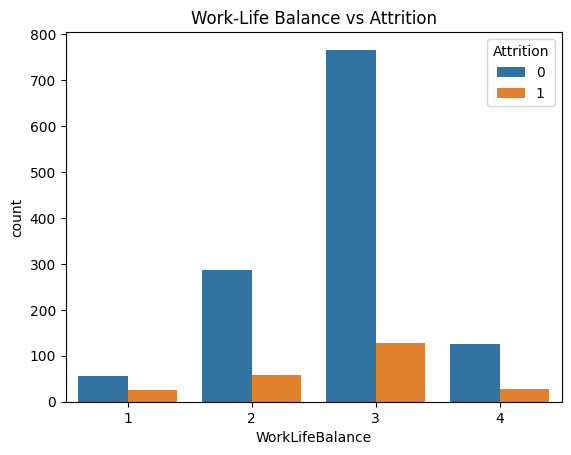

In [16]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Work-Life Balance vs Attrition")
plt.savefig(
    "Project2_AttritionAnalysis/visuals/charts/attrition_vs_work-life_balance.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()


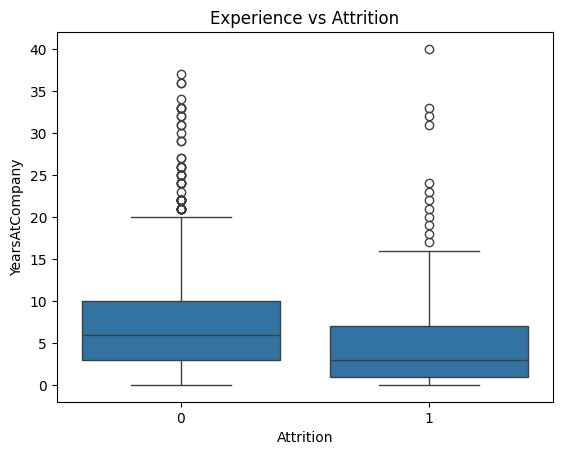

In [15]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Experience vs Attrition")
plt.savefig(
    "Project2_AttritionAnalysis/visuals/charts/experience_vs_attrition.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()


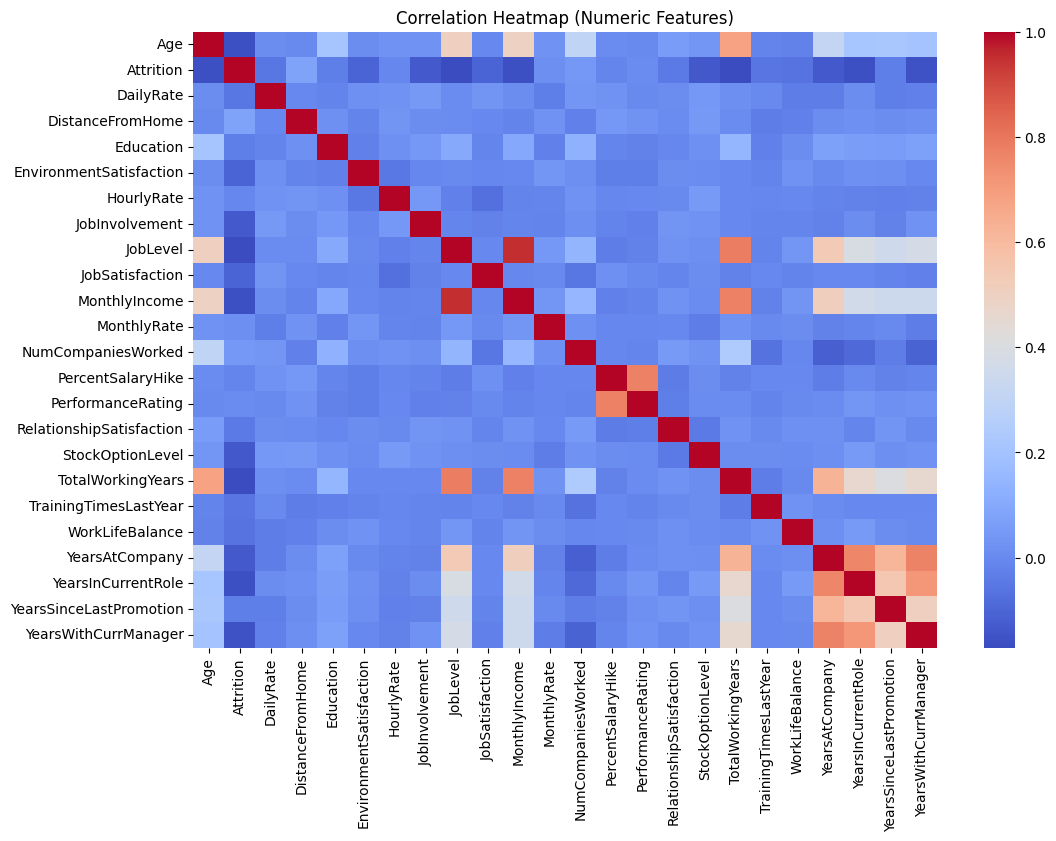

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.savefig(
    "Project2_AttritionAnalysis/visuals/charts/Correlation Heatmap.png",
    bbox_inches="tight",
    dpi=300
)

plt.show()


In [12]:
from scipy.stats import ttest_ind

yes = df[df['Attrition'] == 1]['MonthlyIncome']
no = df[df['Attrition'] == 0]['MonthlyIncome']

ttest_ind(yes, no)


TtestResult(statistic=np.float64(-6.203935765608938), pvalue=np.float64(7.147363985353811e-10), df=np.float64(1468.0))